In [2]:
# import hierarchical clustering libraries
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [3]:
Al=pd.read_csv("C:\\Users\\prasa\\Downloads\\EastWestAirlines.csv")
Al

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [4]:
Al.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


# Hierarchical Clustering

In [5]:
#Normalization using min-max scaler
def norm_func(i):
    x=(i-i.min()/(i.max()-i.min()))
    return(x)

In [6]:
Al_norm = norm_func(Al.iloc[:, 1:])
Al_norm

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,28143.0,0.0,0.75,0.5,0.75,174.0,1.0,0.0,0.0,6999.999759,0.0
1,19244.0,0.0,0.75,0.5,0.75,215.0,2.0,0.0,0.0,6967.999759,0.0
2,41354.0,0.0,0.75,0.5,0.75,4123.0,4.0,0.0,0.0,7033.999759,0.0
3,14776.0,0.0,0.75,0.5,0.75,500.0,1.0,0.0,0.0,6951.999759,0.0
4,97752.0,0.0,3.75,0.5,0.75,43300.0,26.0,2077.0,4.0,6934.999759,1.0
...,...,...,...,...,...,...,...,...,...,...,...
3994,18476.0,0.0,0.75,0.5,0.75,8525.0,4.0,200.0,1.0,1402.999759,1.0
3995,64385.0,0.0,0.75,0.5,0.75,981.0,5.0,0.0,0.0,1394.999759,1.0
3996,73597.0,0.0,2.75,0.5,0.75,25447.0,8.0,0.0,0.0,1401.999759,1.0
3997,54899.0,0.0,0.75,0.5,0.75,500.0,1.0,500.0,1.0,1400.999759,0.0


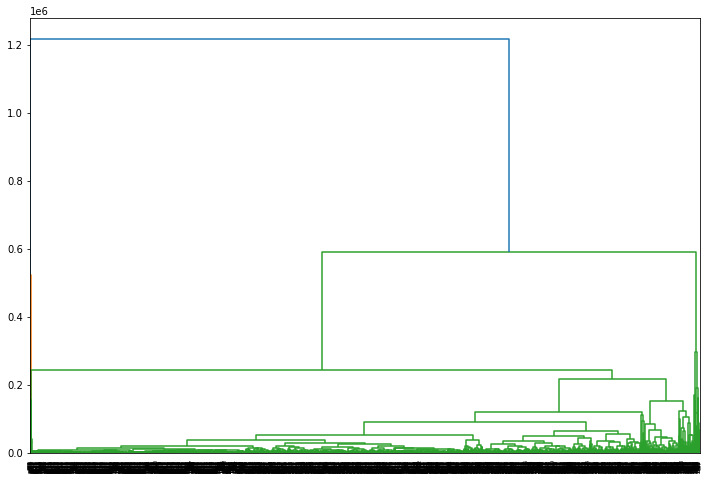

In [7]:
#Creating Dendrogram
plt.figure(figsize=(12,8))
dendrogram=sch.dendrogram(sch.linkage(Al_norm, method='average'))

In [21]:
#Creating Clusters
hc=AgglomerativeClustering(n_clusters=8, affinity= 'euclidean', linkage= 'average')

In [23]:
y_hc=hc.fit_predict(Al_norm)
Clusters=pd.DataFrame(y_hc, columns =['Clusters'])
Clusters

,Clusters
0,6
1,6
2,6
3,6
4,6
...,...
3994,6
3995,6
3996,6
3997,6


In [24]:
#Creating a new column with clusterid and including it in Al_norm dataset
Al_norm['Clusterid']= hc.labels_
Al_norm

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Clusterid
0,28143.0,0.0,0.75,0.5,0.75,174.0,1.0,0.0,0.0,6999.999759,0.0,6
1,19244.0,0.0,0.75,0.5,0.75,215.0,2.0,0.0,0.0,6967.999759,0.0,6
2,41354.0,0.0,0.75,0.5,0.75,4123.0,4.0,0.0,0.0,7033.999759,0.0,6
3,14776.0,0.0,0.75,0.5,0.75,500.0,1.0,0.0,0.0,6951.999759,0.0,6
4,97752.0,0.0,3.75,0.5,0.75,43300.0,26.0,2077.0,4.0,6934.999759,1.0,6
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,18476.0,0.0,0.75,0.5,0.75,8525.0,4.0,200.0,1.0,1402.999759,1.0,6
3995,64385.0,0.0,0.75,0.5,0.75,981.0,5.0,0.0,0.0,1394.999759,1.0,6
3996,73597.0,0.0,2.75,0.5,0.75,25447.0,8.0,0.0,0.0,1401.999759,1.0,6
3997,54899.0,0.0,0.75,0.5,0.75,500.0,1.0,500.0,1.0,1400.999759,0.0,6
